In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [3]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [5]:
tfidf_matrix = scipy.sparse.load_npz('../../processed_files/tfidf_matrix.npz')
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [6]:
tfidf_matrix.shape

(12968, 272069)

In [7]:
df_merged.head()

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ..."
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ..."
2,01187.com,01187.com is available for purchase! - wwwv1.c...,"[com, vailable, purchase, wwwvcom, welcome, uu...","[0, 1, 1, 8, 7, ., c, o, m, , i, s, , a, v, ..."
3,027.ir,"027.ir - dns4.ir 027.ir hits: 7,267 under cons...","[ir, dnsir, ir, hits, construction, coming, so...","[0, 2, 7, ., i, r, , -, , d, n, s, 4, ., i, ..."
4,03h.org,february | 2014 | online marketing review sear...,"[february, online, marketing, review, search, ...","[f, e, b, r, u, a, r, y, , |, , 2, 0, 1, 4, ..."


In [8]:
df_merged.shape

(12975, 4)

In [9]:
type(tfidf_matrix[0])

scipy.sparse.csr.csr_matrix

In [10]:
np.average(tfidf_matrix[[0, 1, 2]].todense(), axis=0)

matrix([[0., 0., 0., ..., 0., 0., 0.]])

## DB Scan

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(tfidf_matrix)

In [13]:
dbscan.labels_

array([-1,  0, -1, ..., -1, -1, -1])

In [14]:
num_clusters = max(dbscan.labels_)
num_clusters

30

In [15]:
dbscan

DBSCAN(eps=0.1)

In [16]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

-1

In [17]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [18]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [19]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  295
cluster:  1 size:  11
cluster:  2 size:  9
cluster:  3 size:  22
cluster:  4 size:  67
cluster:  5 size:  5
cluster:  6 size:  20
cluster:  7 size:  16
cluster:  8 size:  20
cluster:  9 size:  103
cluster:  10 size:  35
cluster:  11 size:  12
cluster:  12 size:  30
cluster:  13 size:  9
cluster:  14 size:  5
cluster:  15 size:  21
cluster:  16 size:  13
cluster:  17 size:  7
cluster:  18 size:  14
cluster:  19 size:  8
cluster:  20 size:  5
cluster:  21 size:  5
cluster:  22 size:  5
cluster:  23 size:  13
cluster:  24 size:  5
cluster:  25 size:  8
cluster:  26 size:  6
cluster:  27 size:  8
cluster:  28 size:  6
cluster:  29 size:  5


In [20]:
len(cluster_list[0])

295

In [21]:
len(cluster_list[1])

11

In [22]:
len(cluster_list[2])

9

In [23]:
len(cluster_list[num_clusters-1])

5

In [24]:
cluster_list[1]

[(1, 5),
 (1, 13),
 (1, 17),
 (1, 77),
 (1, 86),
 (1, 99),
 (1, 104),
 (1, 136),
 (1, 151),
 (1, 156),
 (1, 162)]

In [26]:
[i[1] for i in cluster_list[0]]

[1,
 25,
 27,
 121,
 138,
 141,
 179,
 365,
 373,
 594,
 628,
 631,
 670,
 697,
 723,
 729,
 748,
 752,
 763,
 770,
 782,
 789,
 822,
 943,
 951,
 1040,
 1120,
 1427,
 1436,
 1783,
 1834,
 1850,
 1981,
 1990,
 2002,
 2006,
 2056,
 2059,
 2137,
 2184,
 2188,
 2194,
 2202,
 2337,
 2435,
 2438,
 2481,
 2502,
 2521,
 2524,
 2572,
 2573,
 2574,
 2577,
 2579,
 2585,
 2602,
 2644,
 2673,
 2767,
 2780,
 2795,
 2821,
 2822,
 2824,
 2883,
 2939,
 3024,
 3060,
 3140,
 3158,
 3222,
 3231,
 3313,
 3386,
 3425,
 3494,
 3499,
 3552,
 3590,
 3707,
 3712,
 3770,
 3893,
 3910,
 3912,
 3933,
 3935,
 3952,
 3953,
 3954,
 3956,
 3960,
 3962,
 3971,
 3972,
 3974,
 4000,
 4008,
 4080,
 4195,
 4216,
 4264,
 4299,
 4300,
 4419,
 4433,
 4515,
 4521,
 4562,
 4604,
 4623,
 4664,
 4891,
 4898,
 4943,
 4946,
 5050,
 5278,
 5360,
 5403,
 5483,
 5505,
 5536,
 5540,
 5578,
 5643,
 5655,
 5686,
 5713,
 5725,
 5743,
 5751,
 5754,
 5766,
 5787,
 6257,
 6274,
 6309,
 6423,
 6467,
 6479,
 6503,
 6573,
 6582,
 6594,
 6725,


In [27]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = np.average(tfidf_matrix[[i[1] for i in cluster_list[index]]].todense(), axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-tfidf_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [28]:
intracluster_similarity(0)

(3.9653785308229665e-15, 5.229396938021599e-35)

In [29]:
intracluster_similarity(1)

(1.65081521416176e-16, 6.077163357286271e-64)

In [30]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [32]:
generate_raw_content_cluster_df(10)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
10,100coin.com,100coin.com 您正在访问的域名 (100coin.com) 可以合作或转让! th...,"[coincom, 您正在访问的域名, coincom, 可以合作或转让, domain, ...","[1, 0, 0, c, o, i, n, ., c, o, m, , 您, 正, 在, ...",10
255,achronicleofaddiction.com,things i think about while lying in bed – a ch...,"[things, think, lying, bed, –, chronicle, life...","[t, h, i, n, g, s, , i, , t, h, i, n, k, , ...",10
589,alvarengadentalcare.com,costa rica dental services – costa rica dental...,"[costa, rica, dental, services, –, costa, rica...","[c, o, s, t, a, , r, i, c, a, , d, e, n, t, ...",10
683,anastyles.com,met gala 2014 | vogue and mimosas met gala 201...,"[met, gala, vogue, mimosas, met, gala, weren’t...","[m, e, t, , g, a, l, a, , 2, 0, 1, 4, , |, ...",10
891,artistprint.de,contact - contact: search: » categoriescontact...,"[contact, contact, search, », categoriescontac...","[c, o, n, t, a, c, t, , -, , c, o, n, t, a, ...",10
1342,berqrng.com,berq rng berq rng scroll down berq rng we deve...,"[berq, rng, berq, rng, scroll, berq, rng, deve...","[b, e, r, q, , r, n, g, , b, e, r, q, , r, ...",10
1499,blackminds.tk,welcome to blackminds.tk! welcome to blackmind...,"[welcome, blackmindstk, welcome, blackmindstk,...","[w, e, l, c, o, m, e, , t, o, , b, l, a, c, ...",10
2516,commerciallore.com,south australia | commercial lore making a com...,"[south, australia, commercial, lore, making, c...","[s, o, u, t, h, , a, u, s, t, r, a, l, i, a, ...",10
2823,curvyroads.info,20150720_113350 – curvyroads #everydayadventur...,"[–, curvyroads, everydayadventures, traveling,...","[2, 0, 1, 5, 0, 7, 2, 0, _, 1, 1, 3, 3, 5, 0, ...",10
3890,eximindiacorqoration.com,captcha powered by imunify360 english eximindi...,"[captcha, powered, imunify, english, eximindia...","[c, a, p, t, c, h, a, , p, o, w, e, r, e, d, ...",10


In [33]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x150cfd5f8>,
 <a list of 11 Text xticklabel objects>)

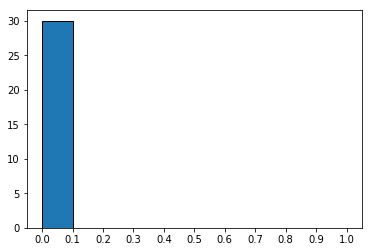

In [34]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [35]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(tfidf_matrix[[x[1] for x in cluster_list[i]]].todense(), axis=0)
                cluster_centroid_j = np.average(tfidf_matrix[[x[1] for x in cluster_list[j]]].todense(), axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [36]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.3928165617406125
